## Probeweise Durchführung einer Teststatistik für durchschnittliche Verslängen pro Gedicht

1. Hypothesen
- **Nullhypothese (H0)**: Es gibt **keinen signifikanten Unterschied** in der Verslänge zwischen den beiden Subsamples.
- **Alternativhypothese (H1)**: Es gibt **einen signifikanten Unterschied** in der Verslänge zwischen den beiden Subsamples.

In [1]:
import json
import os
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

2. Daten vorbereiten

In [2]:
# Erstellung eines Dictionarys für jedes Teilkorpus (M/W)
# Key: Gedichttitel, Value: durchschnittliche Anzahl von Tokens/Vers

def count_tokens(poem):
    total_tokens = 0
    for line in poem.values():
        text = line['text']
        tokens = text.split()
        total_tokens += len(tokens)
    return total_tokens

# Ordnerpfad mit den JSON-Dateien
#folder_path = 'corpus_selenium_m'

def avg_tokens_per_line(folder_path: str):
# Dictionary zur Speicherung der Ergebnisse
    average_tokens_per_line = {}

    # Durchlaufe die JSON-Dateien im Ordner
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                poem_data = json.load(file)
                poem_lines = poem_data['poem']
                title = poem_data['title']
                num_lines = len(poem_lines)
                num_tokens = count_tokens(poem_lines)
                average_tokens = num_tokens / num_lines
                average_tokens_per_line[title] = average_tokens  # mit Runden: round(average_tokens, 3)
    
    return average_tokens_per_line

In [3]:
avg_vers_lengths_m = avg_tokens_per_line('corpus_selenium_m')
print(avg_vers_lengths_m)
print(f'N: {len(avg_vers_lengths_m)}')

{'teiresias-2570': 5.0, 'gehoeft-11241': 5.615384615384615, 'real-life-14343': 8.583333333333334, 'die-schlafkammer-des-lkw-fahrers-und-sein-poesiealbum-16429': 9.048780487804878, 'nach-dem-loop-leben-7422': 4.375, 'die-kleinste-armee-15134': 4.416666666666667, 'trostlied-im-konjunktiv-14383': 5.833333333333333, 'hauptbahnhof-frankfurt-am-main-iii-12362': 4.190476190476191, 'meine-gespenstische-geliehene-353': 4.1, 'tierleben-10-4019': 3.7333333333333334, 'als-statussymbol-16201': 11.2, 'aber-wir-werden-durch-den-abend-11566': 2.6, 'der-stille-grund-11236': 6.620689655172414, 'mit-sieben-augen-aufgewacht-und-keines-sieht-15222': 10.666666666666666, 'elementares-gedicht-2-12336': 5.529411764705882, 'halbfertige-zeichnung-13899': 5.722222222222222, 'oh-doerflichkeit-veraenderung-14337': 8.875, 'herde-der-rede-v-381': 6.258064516129032, 'als-belgien-furchtbar-war-13241': 5.466666666666667, 'neumen-unwelt-korollar': 5.25, 'mombasa-island-zweiter-juli-meine-liebste-12010': 6.770491803278689

In [4]:
avg_vers_lengths_w = avg_tokens_per_line('corpus_selenium_w')
print(avg_vers_lengths_w)
print(f'N: {len(avg_vers_lengths_w)}')

{'jetzt-da-die-letzten-bilder-verschwunden-sind-14895': 7.818181818181818, 'aus-duengerkind-i-15421': 4.5, 'kaskade-des-gluecks-12653': 5.75, 'bukowina-i-545': 2.2222222222222223, 'uraniafalter-13623': 7.88, 'nichts-12405': 8.333333333333334, 'so-augenweide-achsen-doch-als-springe-und-trete-man-rueckwaerts-15456': 9.3, 'vorhersehbar-infiziert-11022': 6.75, 'muede-wie-ich-12403': 8.88888888888889, 'grabende-13886': 4.25, 'balance-balance-1520': 4.857142857142857, 'hibiskus-14762': 6.0, 'brief-im-april-15724': 7.916666666666667, 'es-strahlt-ab-wie-eine-waerme-15424': 10.625, 'so-augenweide-achsen-als-stuende-man-am-franzoesischen-fenster-15452': 9.1, 'donauwuerfel-vierter-wuerfel-15111': 5.554545454545455, 'noch-bist-du-da-555': 2.823529411764706, 'loechrig-mein-speicher-14543': 3.6666666666666665, 'donauwuerfel-erster-wuerfel-15110': 5.845454545454546, 'wildern-13889': 3.388888888888889, 'so-augenweide-achsen-man-trippelt-zu-weit-nach-links-15455': 9.7, 'sein-fliegen-liegt-nicht-der-ana

3. Deskriptive Statistik
- Durchschnitt (Mittelwert)
- Standardabweichung der Verslängen für jedes Subsample

In [5]:
def calculate_statistics(verse_lengths):
    # Berechnung des Durchschnitts (Mittelwert)
    average = statistics.mean(verse_lengths)
    
    # Berechnung der Standardabweichung
    std_deviation = statistics.stdev(verse_lengths)
    
    return average, std_deviation

# Extrahiere die Verslängen aus dem Dictionary
verse_lengths_m = list(avg_vers_lengths_m.values())
verse_lengths_w = list(avg_vers_lengths_w.values())

# Berechne Durchschnitt und Standardabweichung
average_length_m, std_deviation_m = calculate_statistics(verse_lengths_m)
average_length_w, std_deviation_w = calculate_statistics(verse_lengths_w)

# Ausgabe der Ergebnisse
print("Durchschnittliche Verslänge Männer:", average_length_m)
print("Durchschnittliche Verslänge Frauen:", average_length_w)
print("Standardabweichung der Verslänge Männer:", std_deviation_m)
print("Standardabweichung der Verslänge Frauen:", std_deviation_w)


Durchschnittliche Verslänge Männer: 6.038382038221746
Durchschnittliche Verslänge Frauen: 6.536569921710585
Standardabweichung der Verslänge Männer: 4.003073073905154
Standardabweichung der Verslänge Frauen: 3.4729603525280357


4. Statistischer Test

## t-Test:
- Ergebnis: p-Wert
- gibt an, wie wahrscheinlich es ist, dass der beobachteter Unterschied in der Verslänge zwischen den Subsamples zufällig ist
- kleiner p-Wert (kleiner als 0,05) bedeutet statistische Signifikanz
- p-Wert als Basis für Entscheidung, ob die Nullhypothese abgelehnt wird oder nicht

In [6]:
# Durchschnittliche Verslänge und Standardabweichung für den Subsample mit männlichen Autoren siehe oben
sample_size_m = len(verse_lengths_m)

# Durchschnittliche Verslänge und Standardabweichung für den Subsample mit weiblichen Autoren siehe oben
sample_size_w = len(verse_lengths_w)

# Durchführung des t-Tests
t_statistic, p_value = ttest_ind([average_length_m], [average_length_w],
                                alternative='two-sided',
                                equal_var=False)

# Berechnung der Degrees of Freedom
df = ((std_deviation_m ** 2 / sample_size_m + std_deviation_w ** 2 / sample_size_w) ** 2) / (
        (std_deviation_m ** 2 / sample_size_m) ** 2 / (sample_size_m - 1) + (
        std_deviation_w ** 2 / sample_size_w) ** 2 / (sample_size_w - 1))

# Ausgabe der Ergebnisse
print("t-Statistic:", t_statistic)
print("p-Value:", p_value)
print("Degrees of Freedom:", df)

t-Statistic: nan
p-Value: nan
Degrees of Freedom: 220.05189263285226


/Users/jule/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jule/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mögliche Ursache/Problem für diese Fehlermeldung:

- Voraussetzung für t-Test (siehe Stefanowitsch, Kap. 6, S. 196): Normalverteilung, nur sehr kleine Unterschiede zwischen den Subsamples, Ausreißer oder sehr starke Abweichungen 

&rarr; testen, ob vorliegende Daten normalverteilt sind

In [13]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Tokenfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Tokenfrequenzen für {sample_name} sind nicht normalverteilt.")

# Durchführung des Tests für beide Subsamples
test_normality(verse_lengths_m, "Sample M")
test_normality(verse_lengths_w, "Sample W")

Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.4257562756538391
p-Wert: 9.268721937957198e-21
Die Tokenfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.6479308605194092
p-Wert: 7.732259521249854e-14
Die Tokenfrequenzen für Sample W sind nicht normalverteilt.


Visualisierung der Verteilung

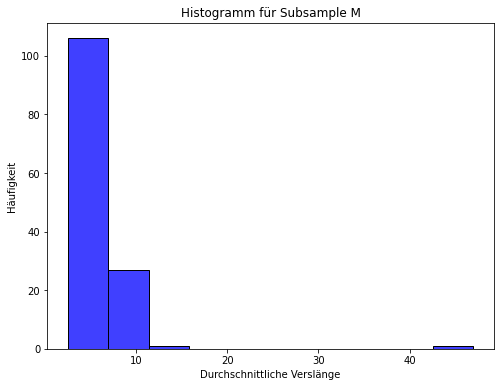

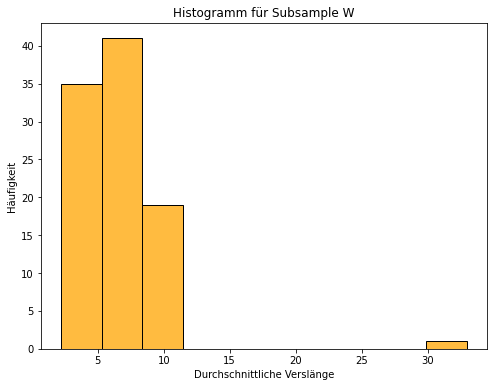

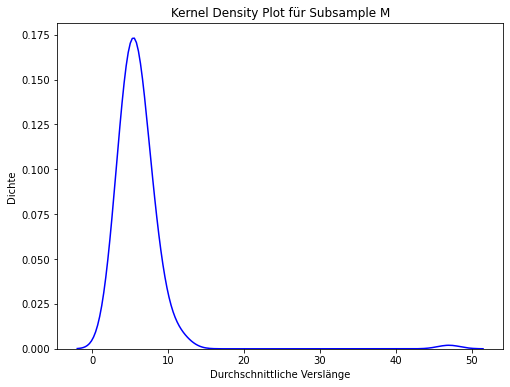

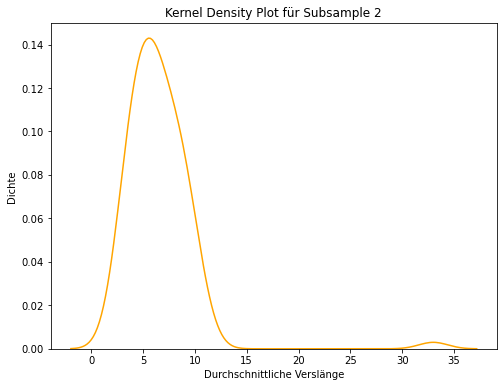

In [8]:
# Histogramm für Subsample M
plt.figure(figsize=(8, 6))
sns.histplot(verse_lengths_m, kde=False, color='blue', bins=10)
plt.title('Histogramm für Subsample M')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Häufigkeit')
plt.show()

# Histogramm für Subsample W
plt.figure(figsize=(8, 6))
sns.histplot(verse_lengths_w, kde=False, color='orange', bins=10)
plt.title('Histogramm für Subsample W')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Häufigkeit')
plt.show()

# Kernel Density Plot für Subsample M
plt.figure(figsize=(8, 6))
sns.kdeplot(verse_lengths_m, color='blue')
plt.title('Kernel Density Plot für Subsample M')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Dichte')
plt.show()

# Kernel Density Plot für Subsample W
plt.figure(figsize=(8, 6))
sns.kdeplot(verse_lengths_w, color='orange')
plt.title('Kernel Density Plot für Subsample 2')
plt.xlabel('Durchschnittliche Verslänge')
plt.ylabel('Dichte')
plt.show()

&rarr; **t-Test** (= Test für Kardinaldaten) kann nicht verwendet werden, weil Daten nicht normalverteilt sind!

## &rarr; **Mann-Whitney-U-Test** (= Test für Ordinaldaten)
- Ausweichmöglichkeit, wenn t-Test wegen nicht normalverteilten Daten nicht sinnvoll ist (siehe Stefanowitsch, Kap. 6, S. 198)

In [21]:
# Durchführung des Mann-Whitney-U-Tests
u_statistic, p_value = mannwhitneyu(verse_lengths_m, verse_lengths_w, alternative='two-sided')

# Ausgabe der Ergebnisse
print("Mann-Whitney-U-Test:")
print("U-Statistik:", u_statistic)
print("p-Wert:", p_value)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")

print(f"(U = {u_statistic}, N1 = {sample_size_m}, N2 = {sample_size_w}, p > 0.05)")

Mann-Whitney-U-Test:
U-Statistik: 5560.0
p-Wert: 0.06621298163563925
Es gibt keinen signifikanten Unterschied zwischen den Subsamples.
(U = 5560.0, N1 = 135, N2 = 96, p > 0.05)


**&rarr; Nullhypothese kann nicht abgelehnt werden.**

- <span style="color:red"> aber! : p-Wert ist "nur" um ca. 0.016 größer, also fast an 0.05 dran </span>?

5. Visualisierung

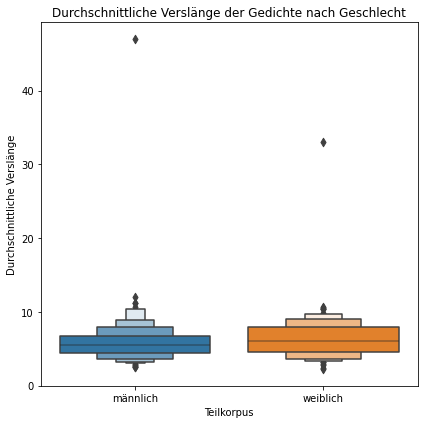

In [14]:
# Zusammenführen der Daten in einem DataFrame für seaborn
import pandas as pd
data = pd.DataFrame({
    "Geschlecht": ["männlich"] * sample_size_m + ["weiblich"] * sample_size_w,
    "Durchschnittliche Verslänge": verse_lengths_m + verse_lengths_w
})

# Boxplot erstellen
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxenplot(x="Geschlecht", y="Durchschnittliche Verslänge", data=data, ax=ax)

# Label und Titel bestimmen
plt.xlabel("Teilkorpus")
plt.ylabel("Durchschnittliche Verslänge")
plt.title("Durchschnittliche Verslänge der Gedichte nach Geschlecht")


# Plot anzeigen
plt.tight_layout()
plt.show()

MannwhitneyuResult(statistic=18225.0, pvalue=4.524287799021116e-52) MannwhitneyuResult(statistic=9216.0, pvalue=1.7734965593085555e-37)
